In [79]:
import numpy as np
import sklearn.neighbors
import sklearn.svm
import sklearn.linear_model
import sklearn.ensemble
import sklearn.naive_bayes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [80]:
# !pip install --upgrade seaborn

In [81]:
# !pip install --upgrade matplotlib

In [82]:
def classifierTest(feat, K, RF, GB):
    acc_mat = (np.empty((300,1)))
    type_mat = [] 

    for i in range(50):
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(feat, labels, test_size=0.33, random_state=i)
        y_test = np.ravel(y_test)
        y_train = np.ravel(y_train)


        knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = K)
        knn.fit(X_train, y_train)
        knn_score = knn.score(X_test, y_test)
        acc_mat[6*i, 0] = knn_score
        type_mat.append("KNN")

        svm = sklearn.svm.SVC(kernel='rbf')
        svm.fit(X_train, y_train)
        svm_score = svm.score(X_test, y_test)
        acc_mat[(6*i)+1, 0] = svm_score
        type_mat.append("SVM")

        lr = sklearn.linear_model.LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)
        lr_score = lr.score(X_test, y_test)
        acc_mat[(6*i)+2, 0] = lr_score
        type_mat.append("LR")

        rf = sklearn.ensemble.RandomForestClassifier(n_estimators=RF)
        rf.fit(X_train, y_train)
        rf_score = rf.score(X_test, y_test)
        acc_mat[(6*i)+3, 0] = rf_score
        type_mat.append("RF")

        gb = sklearn.ensemble.GradientBoostingClassifier(n_estimators=GB)
        gb.fit(X_train, y_train)
        gb_score = gb.score(X_test, y_test)
        acc_mat[(6*i)+4, 0] = gb_score
        type_mat.append("GB")

        nb = sklearn.naive_bayes.GaussianNB()
        nb.fit(X_train, y_train)
        nb_score = nb.score(X_test, y_test)
        acc_mat[(6*i)+5, 0] = nb_score
        type_mat.append("NB")


    acc_df = pd.DataFrame(acc_mat)
    acc_df.columns = ["Accuracy"]
    type_df = pd.DataFrame(type_mat)
    type_df.columns = ["Classifier"]
    acc_df = acc_df.join(type_df)
        
    return acc_df

In [83]:
data = pd.read_pickle("data.pkl")

feat = data[["Kur_ECR", "Kur_FCU", "Skew_ECR", "Skew_FCU", "SSC_ECR", "SSC_FCU", "WA_ECR", "WA_FCU", "WL_ECR", "WL_FCU", "SD_ECR", "SD_FCU", "Zc_ECR", "Zc_FCU", "Mean_ECR", "Mean_FCU","Var_ECR", "Var_FCU"]]
labels = data["Labels"]

labels = (np.array(labels)).reshape((-1,1))

In [84]:
acc_df1 = classifierTest(feat, 7, 31, 23)
acc_df1["Feature Set"] = "All"

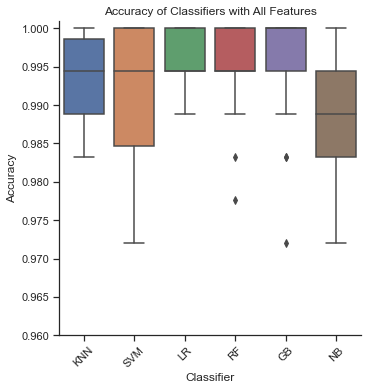

In [85]:
p1 = sns.catplot(data=acc_df1, x="Classifier", y="Accuracy", kind="box")
p1.set(title="Accuracy of Classifiers with All Features", ylim=(0.96,1.001))
p1.set_xticklabels(rotation=45)

In [86]:
pca_a = pd.read_pickle("all_pca.pkl")
feat = pca_a[["Dim1", "Dim2", "Dim3"]]

In [87]:
acc_df2 = classifierTest(feat, 1, 49, 20)
acc_df2["Feature Set"] = "PCA All"

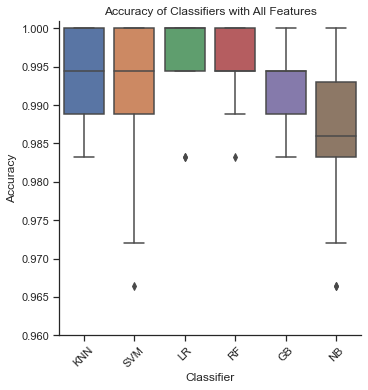

In [88]:
p2 = sns.catplot(data=acc_df2, x="Classifier", y="Accuracy", kind="box")
p2.set(title="Accuracy of Classifiers with All Features", ylim=(0.96,1.001))
p2.set_xticklabels(rotation=45)

In [89]:
feat = data[["SSC_ECR", "WA_FCU", "WL_ECR", "WL_FCU","SD_ECR", "SD_FCU","Mean_ECR", "Mean_FCU", "Var_FCU"]]

In [90]:
acc_df3 = classifierTest(feat, 7, 15, 36)
acc_df3["Feature Set"] = "Subset"

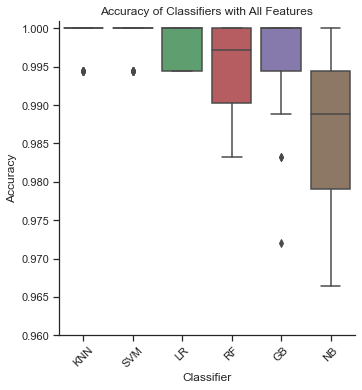

In [91]:
p3 = sns.catplot(data=acc_df3, x="Classifier", y="Accuracy", kind="box")
p3.set(title="Accuracy of Classifiers with All Features", ylim=(0.96,1.001))
p3.set_xticklabels(rotation=45)

In [92]:
pca_s = pd.read_pickle("subs_pca.pkl")
feat = pca_s[["Dim1", "Dim2"]]

In [93]:
acc_df4 = classifierTest(feat, 5, 49, 44)
acc_df4["Feature Set"] = "PCA Subset"

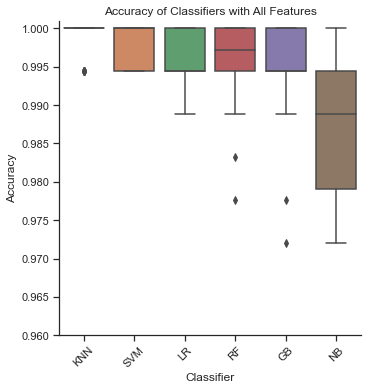

In [94]:
p4 = sns.catplot(data=acc_df4, x="Classifier", y="Accuracy", kind="box")
p4.set(title="Accuracy of Classifiers with All Features", ylim=(0.96,1.001))
p4.set_xticklabels(rotation=45)

In [95]:
all_data = acc_df1.append([acc_df2, acc_df3, acc_df4])

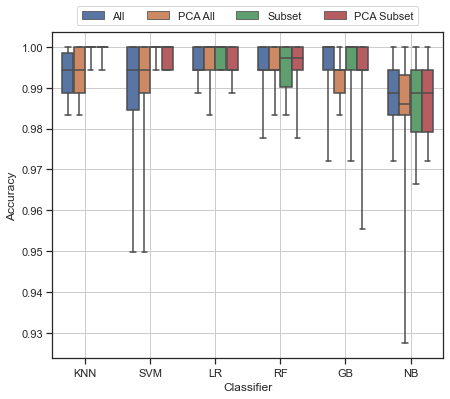

In [125]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))

box = sns.boxplot(y="Accuracy", x="Classifier", hue="Feature Set", data=all_data,
            whis=[0, 100], width=0.7)

ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.legend(ncol = 4, bbox_to_anchor=(0.5, 1.05), loc='center', borderaxespad=0)

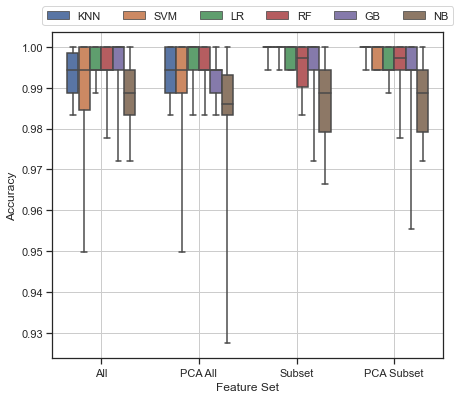

In [124]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 6))

box = sns.boxplot(y="Accuracy", x="Feature Set", hue="Classifier", data=all_data,
            whis=[0, 100], width=0.7)


ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.legend(ncol = 6, bbox_to_anchor=(0.5, 1.05), loc='center', borderaxespad=0)

In [134]:
for (fs,nfs) in [(acc_df1, "All"), (acc_df2, "PCA All"), (acc_df3, "Subset"), (acc_df4, "Subset All")]:
    for cl in ["KNN", "SVM", "LR", "RF", "GB", "NB"]:
        filt = fs[fs["Classifier"]==cl]
        m = np.mean(filt["Accuracy"])
        print(nfs, cl, m)

All KNN 0.9924022346368716
All SVM 0.9898324022346371
All LR 0.9959776536312844
All RF 0.9957541899441338
All GB 0.9957541899441341
All NB 0.9898324022346371
PCA All KNN 0.9931843575418999
PCA All SVM 0.9909497206703911
PCA All LR 0.9979888268156423
PCA All RF 0.9951955307262569
PCA All GB 0.9922905027932962
PCA All NB 0.984469273743017
Subset KNN 0.9986592178770947
Subset SVM 0.9986592178770947
Subset LR 0.9973184357541893
Subset RF 0.9955307262569836
Subset GB 0.9957541899441342
Subset NB 0.9862569832402237
Subset All KNN 0.9987709497206702
Subset All SVM 0.997988826815642
Subset All LR 0.9957541899441338
Subset All RF 0.9958659217877094
Subset All GB 0.994189944134078
Subset All NB 0.9870391061452517
